In [1]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
#Load Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#Preprocess
train_images=train_images.reshape((60000,28,28,1)).astype('float')/255
test_images=test_images.reshape((10000,28,28,1)).astype('float')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [4]:
#Build CNN
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [5]:
#Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
#Train
history = model.fit(train_images, train_labels, epochs=5, batch_size=40, validation_split=0.1)

Epoch 1/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9512 - loss: 0.1601 - val_accuracy: 0.9830 - val_loss: 0.0587
Epoch 2/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9848 - loss: 0.0496 - val_accuracy: 0.9893 - val_loss: 0.0356
Epoch 3/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9889 - loss: 0.0349 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 4/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9905 - val_loss: 0.0350
Epoch 5/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9897 - val_loss: 0.0422


In [7]:
#Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0425
Test Accuracy: 98.75%
Test Loss: 4.25%


In [8]:
#Save model
model.save("../models/mnist_cnn_model.keras")

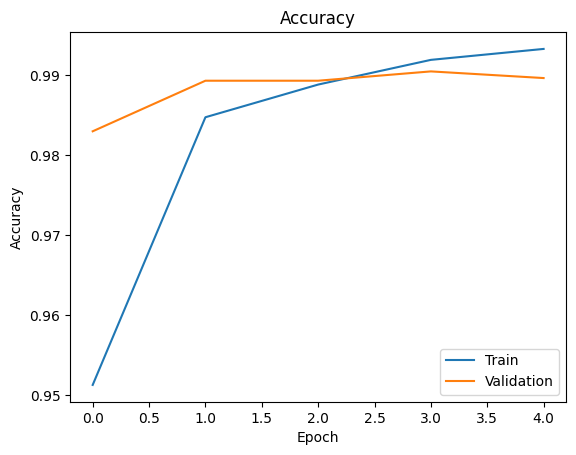

In [9]:
#Plot Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()